In [21]:

import re

# IMPORTANT: Counting total number of bytes in pages is illogical - Pages are NOT always fully filled up

log_line_pattern = r'^\s*\d\s+\d+\s+(W|R)\s+(\d+).+$'

def analyze_disk_io_log_for(disk_io_log_file):
    log_file = open(disk_io_log_file, 'r')

    line_count = 0

    io = { 'R': 0, 'W': 0 }
    blocks = set()

    for log_line in log_file:
        line_count += 1

        if line_count == 1 or len(log_line.strip()) == 0:
            continue

        match = re.match(log_line_pattern, log_line)

        if match is None:
            continue

        operation_type = match.group(1)
        block_number = int(match.group(2))

        io[operation_type] += 1
        blocks.add(block_number)

    reads = io['R']
    writes = io['W']

    total_blocks = len(blocks)

    return reads, writes, total_blocks

sqlite3_disk_io_metrics = analyze_disk_io_log_for('../benchmarks/sqlite3/disk_io_log')
forestdb_disk_io_metrics = analyze_disk_io_log_for('../benchmarks/forestdb/disk_io_log')
leveldb_disk_io_metrics = analyze_disk_io_log_for('../benchmarks/leveldb/disk_io_log')

print('SQLite3')
print(sqlite3_disk_io_metrics)

print('ForestDB')
print(forestdb_disk_io_metrics)

print('LevelDB')
print(leveldb_disk_io_metrics)

SQLite3
(1, 23252, 8630)
ForestDB
(11192, 6742, 17340)
LevelDB
(2, 300, 269)


In [22]:
import numpy as np 
import matplotlib.pyplot as plt

storage_engines_labels = ['SQLite3', 'ForestDB', 'LevelDB']

storage_engines_labels_axis = np.arange(len(storage_engines_labels))

Number of blocks used

No handles with labels found to put in legend.


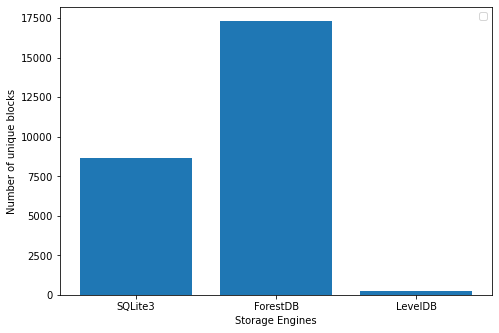

In [23]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

numbers_of_blocks = [sqlite3_disk_io_metrics[2], forestdb_disk_io_metrics[2], leveldb_disk_io_metrics[2]]

ax.bar(storage_engines_labels, numbers_of_blocks)

plt.xlabel('Storage Engines')
plt.ylabel('Number of unique blocks')
plt.legend()
plt.show()

Total number of read / write IO operations

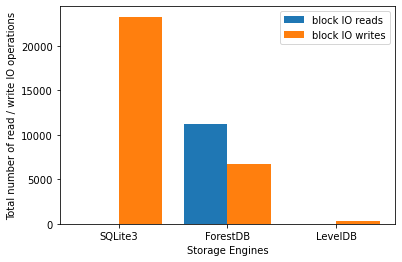

In [24]:
bytes_read = [sqlite3_disk_io_metrics[0], forestdb_disk_io_metrics[0], leveldb_disk_io_metrics[0]]
bytes_written = [sqlite3_disk_io_metrics[1], forestdb_disk_io_metrics[1], leveldb_disk_io_metrics[1]]

plt.bar(storage_engines_labels_axis - 0.2, bytes_read, 0.4, label = 'block IO reads')
plt.bar(storage_engines_labels_axis + 0.2, bytes_written, 0.4, label = 'block IO writes')

plt.xticks(storage_engines_labels_axis, storage_engines_labels)
plt.xlabel('Storage Engines')
plt.ylabel('Total number of read / write IO operations')
plt.legend()
plt.show()